# Creating a Kaggle Workflow

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
train = pd.read_csv('train.csv')

In [5]:
holdout = pd.read_csv('test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [9]:
def master_function(df, columns):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_cabin(df)
    df = process_titles(df)
    for col in columns:
        df = create_dummies(df, col)
    return df

In [10]:
columns = ["Age_categories", "Fare_categories","Title", "Cabin_type", "Sex"]

In [11]:
train = master_function(train, columns)

In [12]:
holdout = master_function(holdout, columns)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Embarked                    891 non-null    object  
 11  Age_categories              891 non-null    category
 12  Fare_categories             891 non-null    category
 13  Cabin_type          

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,...,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.699966,0.523008,0.381594,32.204208,0.198653,0.049383,0.028058,...,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,0.352413,0.647587
std,257.353842,0.486592,0.836071,17.731181,1.102743,0.806057,49.693429,0.399210,0.216787,0.165232,...,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397,0.477990,0.477990
min,1.000000,0.000000,1.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

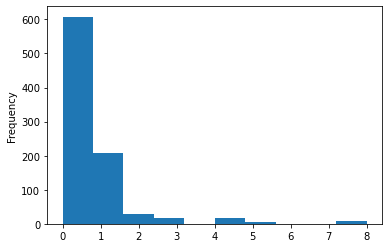

In [15]:
train['SibSp'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

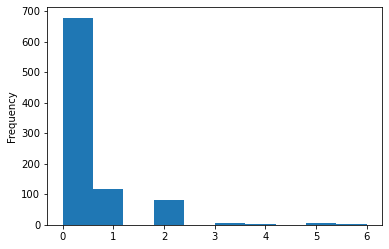

In [16]:
train['Parch'].plot.hist()

<AxesSubplot:xlabel='SibSp'>

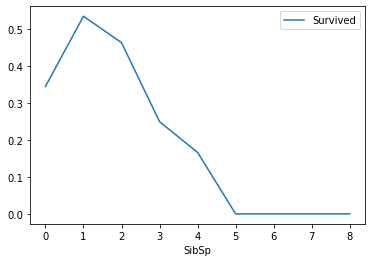

In [17]:
sib_pivot = pd.pivot_table(train, index='SibSp', values='Survived')
sib_pivot.plot()

<AxesSubplot:xlabel='Parch'>

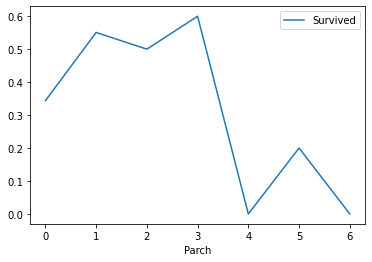

In [18]:
par_pivot = pd.pivot_table(train, index='Parch', values='Survived')
par_pivot.plot()

In [19]:
train['relatives'] = train['SibSp'] + train['Parch']
holdout['relatives'] = holdout['SibSp'] + holdout['Parch']

<AxesSubplot:xlabel='relatives'>

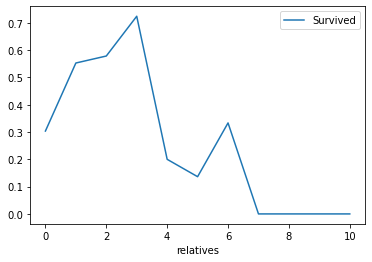

In [20]:
rel_pivot = pd.pivot_table(train, index='relatives', values='Survived')
rel_pivot.plot()

Looks like the ideal situation is to have a low amount of family aboard the titanic with you, but not 0 family members. The optimal survival rate occured for people who had 3 relatives (a sum of parents, children, siblings, and spouses) with them aboard. after 3 there is a pretty notable dropoff, as having a large family might make it harder for you to be saved. However, having no family aboard also means your survival odds were quite low. This might be because you had no one to stick up for you. However, the most likely reason for this is that in 1912, it is probably most likely that men were traveling by themselves, as opposed to women and children, who would be with their families, and thus more likely to be saved.

In [21]:
def is_alone(df):
    df['isalone'] = None
    df.loc[(df['relatives']==0), 'isalone'] = 1
    df.loc[(df['relatives']!=0), 'isalone'] = 0
    return df

In [22]:
train = is_alone(train)

In [23]:
holdout = is_alone(holdout)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male,relatives,isalone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,1,0,1


In [25]:
from sklearn.feature_selection import RFECV

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Embarked                    891 non-null    object  
 11  Age_categories              891 non-null    category
 12  Fare_categories             891 non-null    category
 13  Cabin_type          

In [28]:
def select_features(df):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis=1)
    features = [col for col in df.columns if col not in ['PassengerId', 'Survived']]
    all_X = df[features]
    all_y = df['Survived']
    estimator = RandomForestClassifier(random_state=1)
    selector = RFECV(estimator, cv=10)
    selector.fit(all_X, all_y)
    print(all_X.columns[selector.support_])
    return all_X.columns[selector.support_]

In [29]:
best_features = select_features(train)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12',
       'Fare_categories_12-50', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Cabin_type_A', 'Cabin_type_B',
       'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown',
       'Sex_female', 'Sex_male', 'relatives'],
      dtype='object')


In [30]:
best_features

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12',
       'Fare_categories_12-50', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Cabin_type_A', 'Cabin_type_B',
       'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown',
       'Sex_female', 'Sex_male', 'relatives'],
      dtype='object')

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn.linear_model import LogisticRegression

In [39]:
def select_model(df, features, target):
    all_X = df[features]
    all_y = df[target]
    models = [{
    "name": "LogisticRegression",
    "estimator": LogisticRegression(),
    "hyperparameters":
        {
            "solver": ["newton-cg", "lbfgs", "liblinear"]
        }
}, 
    {
    "name": "KNeighborsClassifier",
    "estimator": KNeighborsClassifier(),
    "hyperparameters":
        {
            "n_neighbors": range(1,20,2),
            "weights": ["distance", "uniform"],
            "algorithm": ["ball_tree", "kd_tree", "brute"],
            "p": [1,2]
        }
},
    {
    "name": "RandomForestClassifier",
    "estimator": RandomForestClassifier(),
    "hyperparameters":
        {
            "n_estimators": [4, 6, 9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 5, 10],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [1, 5, 8],
            "min_samples_split": [2, 3, 5],

        }
}]
    for model in models:
        print(model['name'])
        clf = GridSearchCV(model['estimator'], param_grid=model['hyperparameters'], cv=10)
        clf.fit(all_X, all_y)
        model['best_params'] = clf.best_params_
        model['best_score'] = clf.best_score_
        model['best_estimator'] = clf.best_estimator_
        print(model['best_params'])
        print(model['best_score'])
    return models 

In [40]:
models = select_model(train, best_features, 'Survived')
models

LogisticRegression


/Users/lroberts/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lroberts/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

{'solver': 'newton-cg'}
0.8216104868913858
KNeighborsClassifier
{'algorithm': 'kd_tree', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
0.7767415730337078
RandomForestClassifier
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}
0.8339450686641697


[{'name': 'LogisticRegression',
  'estimator': LogisticRegression(),
  'hyperparameters': {'solver': ['newton-cg', 'lbfgs', 'liblinear']},
  'best_params': {'solver': 'newton-cg'},
  'best_score': 0.8216104868913858,
  'best_estimator': LogisticRegression(solver='newton-cg')},
 {'name': 'KNeighborsClassifier',
  'estimator': KNeighborsClassifier(),
  'hyperparameters': {'n_neighbors': range(1, 20, 2),
   'weights': ['distance', 'uniform'],
   'algorithm': ['ball_tree', 'kd_tree', 'brute'],
   'p': [1, 2]},
  'best_params': {'algorithm': 'kd_tree',
   'n_neighbors': 19,
   'p': 1,
   'weights': 'distance'},
  'best_score': 0.7767415730337078,
  'best_estimator': KNeighborsClassifier(algorithm='kd_tree', n_neighbors=19, p=1,
                       weights='distance')},
 {'name': 'RandomForestClassifier',
  'estimator': RandomForestClassifier(),
  'hyperparameters': {'n_estimators': [4, 6, 9],
   'criterion': ['entropy', 'gini'],
   'max_depth': [2, 5, 10],
   'max_features': ['log2', 'sq

In [50]:
def save_submission_file(model, features, name="Titanic holdout predictions.csv"):
    predictions = model.predict(holdout[features])
    submission_dict = {"PassengerId": holdout['PassengerId'],
                      "Survived": predictions}
    submission = pd.DataFrame(submission_dict)
    submission.to_csv(name, index=False)

In [44]:
best_model = models[2]["best_estimator"]
best_model

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=3,
                       n_estimators=6)

In [51]:
save_submission_file(best_model, best_features)